# Project - No-show Appointments

### Question: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

## Introduction

> With "No-show Appointments" Dataset, I want to explore what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment. I have listed my four questions and provided reponses and visualizations to answer the questions.

In [423]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [424]:
df = pd.read_csv(r'C:\Users\19802\Documents\UNCC MAFI program\Projects\Python Projects\No-show Appointments\noshowappointments-kagglev2-may-2016.csv')
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2572134369293,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,377511518121127,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [425]:
#Check if missing data exists
df.shape

(110527, 14)

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [427]:
print(df.isna().any())

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool


In [428]:
#check duplicates
sum(df.duplicated())

0

There is no missing data and duplicate data in this dataset.

In [429]:
#Check data types
df.dtypes

PatientId          int64
AppointmentID      int64
Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

#Change Data types

#I didn't sucessfully change PatientId to int in Python
#I changed PatientId data type in Excel


In [430]:
#Check unique values and understand the dataset
df['Gender'].unique()           #F & M
df['ScheduledDay'].nunique()    #103459 differnt scheduled days
df['AppointmentDay'].nunique()  #27 unique appointment days
df['Age'].unique()              #found problem -> 0,-1
df['Neighbourhood'].nunique()   #81 different locations of hospitals
df['Scholarship'].unique()      #0 -->  no wellfare, 1 --> has welfare
df['Hipertension'].unique()     #0, 1
df['Diabetes'].unique()         #0, 1
df['Alcoholism'].unique()       #0, 1
df['Handcap'].unique()          #0, 1, 2, 3, 4
df['SMS_received'].unique()     #0, 1

array([0, 1], dtype=int64)

In [431]:
# Solve the discovered problem in age
# drop patients with age of 0 & -1
df = df.query('Age != 0 and Age != -1')

#Check if age 0 and -1 successfully removed
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   3,   1,  69,  68,  60,  67,  36,  10,  35,
        20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,  24,
        66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,  14,
         9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,  86,
        91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99], dtype=int64)

In [432]:
#Change column name No-show
df = df.rename(columns = {'No-show':'No_show'})
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> ## My 1st question: Is gender an important factor to predict patients' show-up situation?

In [433]:
#filter male patient didn't show up
df_male_noshow = df.query('Gender == "M" and No_show == "Yes"')
df_male_noshow.head()
df_male_noshow.shape

(7405, 14)

In [434]:
#Total number of all male patients
df.query('Gender =="M"').shape

(36869, 14)

In [435]:
#filter female patient didn't show up
df_female_noshow = df.query('Gender == "F" and No_show == "Yes"')
df_female_noshow.head()
df_female_noshow.shape

(14275, 14)

In [436]:
#Total number of female patients
df.query('Gender == "F"').shape

(70118, 14)

Text(0.5, 1.0, 'Gender VS. No Show')

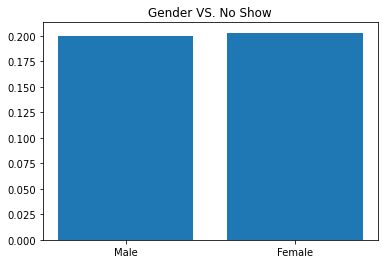

In [437]:
#Since there are more female than male, I am going to use proportion

plt.bar(["M", "F"], [7725/38687, 14594/71840], tick_label =['Male', 'Female'])
plt.title('Gender VS. No Show')

>### Conclusion1: There is no obvious difference, therefore, gender is not an important indicator to predict patients' show-up situation.

>## My 2nd question: Is age an important predictor for patients' show up?

<AxesSubplot:title={'center':'Age Vs No Show Frequency'}, ylabel='Frequency'>

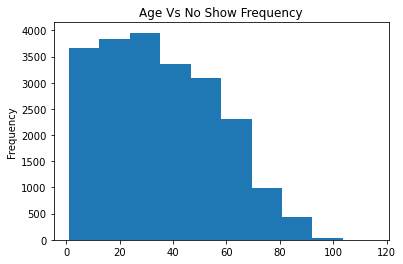

In [547]:
df_noshow = df.query('No_show == "Yes"')
df_noshow['Age'].plot(kind='hist', title='Age Vs No Show Frequency')

>### Conclusion 2: Age is an important factor for showing up prediction. Based on the given data, the older people tend to have a higher chance to show up at their doctor's appointment.

># My 3rd question: Is the welfare program ('Scholarship') a factor for show-up situation?

In [441]:
#filter data with welfare and without welfare respectively
df_welfare = df.query('Scholarship == 1')
df_no_welfare = df.query('Scholarship == 0')

df_welfare.shape

(10809, 14)

In [448]:
df_no_welfare.shape

(96178, 14)

<AxesSubplot:title={'center':'No Show Situation for Paients with Welfare'}, ylabel='No_show'>

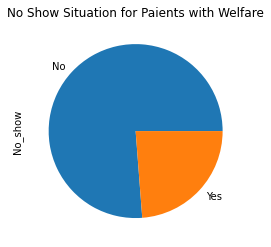

In [449]:
df_welfare['No_show'].value_counts().plot(kind='pie', title ='No Show Situation for Paients with Welfare')

<AxesSubplot:title={'center':'No Show Situation for Patients Without Welfare'}, ylabel='No_show'>

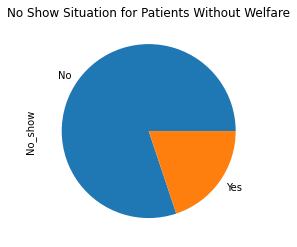

In [464]:
df_no_welfare['No_show'].value_counts().plot(kind = 'pie', title = 'No Show Situation for Patients Without Welfare')

[Text(0, 0, 'Showed Up'), Text(1, 0, 'Did Not Show Up')]

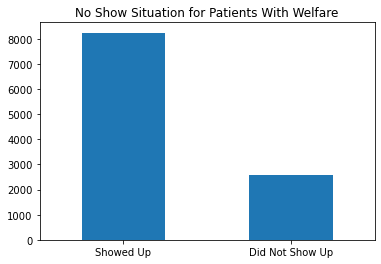

In [465]:
ax = df_welfare['No_show'].value_counts().plot(kind = 'bar', title = 'No Show Situation for Patients With Welfare')
ax.set_xticklabels(['Showed Up', 'Did Not Show Up'], rotation = 0)

[Text(0, 0, 'Showed Up'), Text(1, 0, 'Did Not Show Up')]

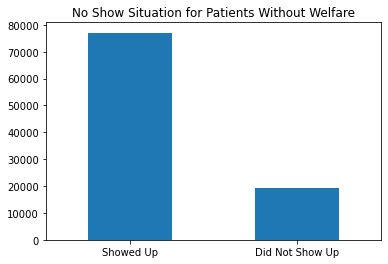

In [466]:
bx = df_no_welfare['No_show'].value_counts().plot(kind = 'bar', title = 'No Show Situation for Patients Without Welfare')
bx.set_xticklabels(['Showed Up', 'Did Not Show Up'], rotation = 0)

Conclustion 3: Based on the pie chart, we can tell that whether the patients have welfare or not does affect the show up rate, but not too much. The calculation is as follows:

In [467]:
#To be more specific
df_scholarship = df.groupby(['Scholarship']).count()['No_show']
df_scholarship

Scholarship
0    96178
1    10809
Name: No_show, dtype: int64

In [468]:
df_show = df.groupby(['No_show', 'Scholarship']).count()['Gender']
df_show

No_show  Scholarship
No       0              77069
         1               8238
Yes      0              19109
         1               2571
Name: Gender, dtype: int64

In [473]:
df_welfare_prop = df_show / df_scholarship
df_welfare_prop

No_show  Scholarship
No       0              0.801316
         1              0.762143
Yes      0              0.198684
         1              0.237857
dtype: float64

>### Conclusion 3: By calculating the number, we know that the no-show rate for people who has welfare is 23.7856%; whereas, the no-show rate for people who doesn't have welfare is 19.8684%. There is a difference of 4%. This calculation proves my conclustion that welfare enrollment matters for no-show rate, but not a very important factor.

># My 4th question: Is the SMS received an important factor to affect no-show situation?

In [481]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [530]:
df['SMS_received'].unique()

array([0, 1], dtype=int64)

In [520]:
df_sms = df.groupby(['No_show', 'SMS_received']).count()['Gender']
df_sms

No_show  SMS_received
No       0               60290
         1               25017
Yes      0               12112
         1                9568
Name: Gender, dtype: int64

In [521]:
df_show = df.groupby(['No_show']).count()['Gender']
df_show

No_show
No     85307
Yes    21680
Name: Gender, dtype: int64

In [522]:
df_sms_prop = df_sms / df_show
df_sms_prop

No_show  SMS_received
No       0               0.706742
         1               0.293258
Yes      0               0.558672
         1               0.441328
Name: Gender, dtype: float64

<AxesSubplot:title={'center':'No Show VS. Whether Got SMS'}, ylabel='Gender'>

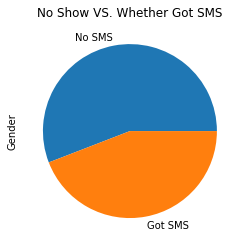

In [528]:
df_sms_prop['Yes'].plot(kind = 'pie', title = 'No Show VS. Whether Got SMS', labels = {'No SMS', 'Got SMS'} )


<AxesSubplot:title={'center':'Show up VS. Whether Got SMS'}, ylabel='Gender'>

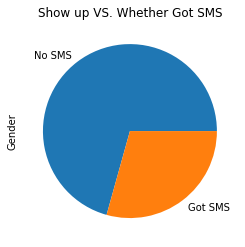

In [546]:
df_sms_prop['No'].plot(kind = 'pie', title = "Show up VS. Whether Got SMS", labels = {'No SMS', 'Got SMS'})

> ### From the number above, we can tell that among no show population, 55.68% of the patients didn't got a SMS, and 44.13% patients got a SMS as a reminder. Conclusion is the pople who didn't receive SMS has a higher percentage for not showing up at their appointment. Therefore, SMS received is an important indicator for no show situation.